머신러닝 알고리즘 중 수학적으로 가장 아름답고, 딥러닝이 등장하기 전까지 데이터 분석 대회를 휩쓸었던 강력한 모델인 '서포트 벡터 머신(SVM)'을 다룬다.

이 시간의 핵심은 "데이터를 나누는 가장 넓은 도로(Margin)를 만드는 법"과, "직선으로 나눌 수 없는 데이터를 차원을 높여서 해결하는 커널 트릭(Kernel Trick)"을 이해하는 것이다.

---

# 📘 [2일차 3교시] 3.1. 서포트 벡터 머신 (SVM): 경계선의 미학

## 1. 좋은 경계선이란 무엇인가? (마진의 철학)

### 1) 단순히 나누는 것과 '잘' 나누는 것의 차이
앞서 배운 로지스틱 회귀나 의사결정나무도 데이터를 분류하는 경계선을 그린다. 하지만 그들은 "나누기만 하면 장땡"이라는 식이다. 경계선이 데이터에 아슬아슬하게 붙어있어도, 현재 데이터만 잘 분류된다면 만족하고 학습을 멈춘다. 하지만 SVM은 다르다. SVM은 "가장 안전하고 튼튼한 경계선"을 추구한다.

두 가지 상황을 비교해 보자.
*   상황 A (위태로운 경계선): 낭떠러지 바로 옆에 도로를 냈다. 운전자가 조금만 실수해도 낭떠러지로 떨어진다. 현재는 통행이 가능하지만, 비가 오거나(노이즈) 초보 운전자가 오면(새로운 데이터) 사고가 날 확률이 높다.
*   상황 B (안전한 경계선): 낭떠러지에서 최대한 멀리 떨어져서 도로를 냈다. 운전자가 조금 실수해서 비틀거려도 도로 안에서 안전하게 주행할 수 있다.

SVM은 바로 이 상황 B를 만드는 알고리즘이다. 단순히 정답을 맞히는 것을 넘어, "데이터와 경계선 사이의 간격을 최대화"하려고 노력한다.

### 2) DMZ(비무장지대)와 마진(Margin)
이 개념을 전쟁 상황에 비유하면 더욱 명확하다. 두 나라(클래스 0과 클래스 1)가 휴전을 하고 국경선을 긋는다고 상상해 보자.

*   결정 경계 (Decision Boundary): 실제로 그어지는 국경선(중앙선)이다. 2차원에서는 선(Line), 3차원 이상에서는 '초평면(Hyperplane)'이라고 부른다.
*   마진 (Margin): 국경선을 기준으로 양쪽 군대 사이의 '안전지대(비무장지대, DMZ)'의 폭이다.
    *   이 폭이 좁으면(Small Margin): 양쪽 군인이 코앞에서 대치한다. 긴장감이 높고, 사소한 도발에도 전쟁(오분류)이 터질 수 있다.
    *   이 폭이 넓으면(Large Margin): 양쪽 군인이 멀리 떨어져 있다. 평화가 유지될 확률이 높고, 어느 정도의 돌발 행동도 완충지대가 흡수해 준다.

SVM의 지상 과제는 바로 이 '마진을 최대화(Maximize Margin)'하는 결정 경계를 찾아내는 것이다. 마진이 넓다는 것은 모델이 데이터의 자잘한 노이즈에 흔들리지 않고 일반화(Generalization)가 잘 되어 있다는 뜻이다.

---

## 2. 서포트 벡터(Support Vector): 최전방을 지키는 정예 요원

### 1) 왜 이름이 '서포트 벡터' 머신인가?
SVM은 아주 독특하고 효율적인 특징을 가지고 있다. 국경선을 결정할 때, 국경에서 멀리 떨어진 안전한 후방의 데이터들은 쳐다보지도 않는다. 오직 국경선 바로 코앞에 있는, 가장 위협적인 데이터 포인트들만 신경 쓴다.

*   후방의 데이터: 국경선 결정에 아무런 영향을 주지 않는다. 이 데이터들이 사라지거나 조금 움직여도 국경선은 바뀌지 않는다.
*   최전방의 데이터: 국경선(마진)에 딱 붙어 있는 데이터들이다. 이들이 국경선의 위치와 각도를 결정한다. 마치 기둥처럼 경계선을 '떠받치고(Support)' 있는 점들이다.

이 최전방에 있는 데이터 점들을 '서포트 벡터(Support Vector)'라고 부른다. SVM이라는 이름은 "서포트 벡터들을 기준으로(Machine) 경계를 찾는다"는 뜻에서 유래했다.

### 2) 효율성: 소수정예의 힘
이것이 왜 중요한가? 수만 명의 환자 데이터가 있어도, 실제로 분류 기준을 만드는 데 쓰이는 것은 경계선 근처의 헷갈리는 환자 몇 명(서포트 벡터)뿐이라는 뜻이다.
따라서 SVM은 데이터가 아무리 많아도 모델을 저장하는 데 필요한 메모리가 적고, 계산 효율이 좋다. 중요한 놈만 기억하면 되기 때문이다.

---

## 3. C 파라미터: 융통성과 엄격함의 줄다리기

현실의 데이터는 교과서처럼 깔끔하게 나뉘지 않는다. 적군 한 명(이상치)이 아군 진영 깊숙이 침투해 있는 경우가 다반사다. 이때 지휘관(분석가)은 중요한 결단을 내려야 한다. 이를 조절하는 것이 `C` (Cost) 파라미터이다.

### 1) Hard Margin (엄격한 기준): C가 클 때
*   명령: "단 한 명의 적군도 우리 땅에 들이지 마라! 오분류는 절대 용납 못 한다."
*   행동: 이상치 하나까지 완벽하게 분류하기 위해 국경선을 구불구불하게 긋거나, 도로 폭(마진)을 아주 좁게 만든다.
*   결과: 학습 데이터는 100점 맞을지 몰라도, 마진이 종이 한 장처럼 얇아진다. 새로운 데이터가 조금만 다르게 들어와도 바로 틀려버린다. 전형적인 '과적합(Overfitting)' 상태가 된다.

### 2) Soft Margin (너그러운 기준): C가 작을 때
*   명령: "이상한 놈 한두 명은 그냥 무시해라. 중요한 건 전체적인 평화(넓은 도로)다."
*   행동: 몇 개의 데이터가 마진 안쪽으로 들어오거나 심지어 반대편으로 넘어가더라도(오분류), 이를 허용하고 도로를 넓게 펴는 데 집중한다.
*   결과: 학습 점수는 조금 떨어질 수 있지만, 마진이 넓어져서 모델이 여유가 생긴다. 새로운 데이터에 대해 유연하게 대처한다. 일반화 성능이 좋아진다.

헬스케어 데이터는 측정 오차나 개인차(노이즈)가 많기 때문에, 보통은 너무 엄격한 Hard Margin보다는 적절한 Soft Margin을 사용하는 것이 유리하다.

---

## 4. 커널 트릭(Kernel Trick): 차원을 높여서 탈출하라

SVM의 백미이자, SVM을 최강의 알고리즘으로 만들어준 기술은 바로 비선형 데이터를 다루는 방식에 있다.

### 1) 2차원에서의 한계: 도넛 모양 데이터
바닥(2차원)에 빨간 구슬들이 모여 있고, 그 주위를 파란 구슬들이 도넛 모양으로 둥글게 감싸고 있다고 상상해 보자.
이 바닥에 막대기(직선) 하나를 던져서 빨간색과 파란색을 완벽하게 가를 수 있을까? 불가능하다. 직선으로는 둥근 원 안의 데이터를 파낼 수 없다.

### 2) 차원 확장: 신의 관점
이때 SVM은 '차원 확장'이라는 마법을 부린다.
*   마치 바닥에 있는 보자기를 확 들어 올리듯이, 2차원 평면 데이터를 3차원 공간으로 날려 보낸다.
*   수학적으로는 $x, y$ 좌표에 $z = x^2 + y^2$ 같은 새로운 높이 축을 추가하는 것이다.
*   그러면 원점(가운데)에 있던 빨간 구슬들은 높이($z$)가 낮아서 바닥에 남고, 바깥쪽에 있던 파란 구슬들은 높이($z$)가 높아서 공중으로 붕 뜨게 된다.

이제 우리는 공중으로 뜬 파란 구슬과 바닥의 빨간 구슬 사이에 판판한 판자(3차원의 평면) 하나를 수평으로 끼워 넣을 수 있다.
이 판자가 바로 결정 경계다. 3차원 공간에서는 분명히 평평한 판자(선형)였는데, 이를 다시 위에서 2차원 바닥으로 내려다보면(투영하면) 동그란 원형의 경계선이 되어 있다.

### 3) 커널 트릭의 의미
원래 데이터를 고차원으로 직접 변환하려면 계산량이 엄청나게 폭증한다. 하지만 수학자들은 데이터를 실제로 고차원으로 보내지 않고도, 마치 보낸 것과 똑같은 효과를 내는 수학 공식을 찾아냈다. 이것을 '커널 트릭(Kernel Trick)'이라고 한다.

대표적인 것이 RBF(Radial Basis Function) 커널이다.
*   이 커널을 쓰면 데이터 포인트 하나하나가 마치 산봉우리처럼 솟아오른다고 생각하면 된다.
*   여기에 `Gamma`라는 파라미터가 등장한다.
    *   Gamma가 크면: 산봉우리가 아주 뾰족해진다. 데이터 하나하나를 감싸는 좁고 복잡한 경계가 생긴다. (과적합 위험)
    *   Gamma가 작으면: 산봉우리가 완만하고 넓게 퍼진다. 경계선이 두루뭉술하고 부드러워진다.

---

## 5. 헬스케어에서의 SVM 활용

딥러닝이 나온 지금도 SVM은 여전히 강력하다. 특히 헬스케어의 특수한 상황에서 빛을 발한다.

### 1) 데이터는 적고 변수는 많을 때 (High Dimensionality)
유전자(DNA) 분석을 생각해보자. 환자 수는 50명밖에 없는데, 유전자 변수는 2만 개나 된다.
딥러닝은 데이터가 적으면 학습이 잘 안된다. 하지만 SVM은 차원이 아무리 높아도 경계면 근처의 서포트 벡터만 잘 찾으면 되기 때문에, 이런 고차원 소량 데이터에서 놀라운 성능을 보여준다.

### 2) 명확한 경계가 필요할 때
암 조직과 정상 조직을 구분하는 영상 의학(Segmentation) 분야에서도 SVM은 픽셀 단위의 분류에 오랫동안 사용되어 왔다. 잡음(노이즈)에 강한 마진의 특성 덕분에 안정적인 성능을 보여준다.

---

## 6. 요약:

1.  마진(Margin): SVM은 단순히 나누는 게 아니라, 데이터와 경계선 사이의 거리(마진)를 최대화하여 '가장 안전한 도로'를 만든다.
2.  서포트 벡터(Support Vector): 도로의 폭을 결정하는 것은 국경선 근처의 소수 정예 데이터들뿐이다.
3.  C (비용): 이상치를 얼마나 허용할지 결정한다. C가 크면 엄격하게(과적합), 작으면 너그럽게(일반화) 긋는다.
4.  커널 트릭: 직선으로 나눌 수 없는 데이터를 고차원으로 보내서 나눈다. 이를 통해 비선형 데이터도 분류할 수 있다.
5.  Gamma: 커널의 민감도를 조절한다. 크면 복잡한 경계, 작으면 단순한 경계를 만든다.


## 3.2. \[예제 1\] SVM의 기본: 마진(Margin) 눈으로 확인하기

SVM이 어떻게 “가장 넓은 도로”를 만드는지 시각화한다.

상황: 두 종류의 세포(정상/감염)를 분류하는 기준선 긋기.

``` python
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# 1. 데이터 생성 (잘 분리된 두 그룹)
# X: 세포 크기, 핵의 크기 등 2가지 특성
# y: 0(정상), 1(감염)
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# 2. SVM 모델 학습 (선형 커널)
# C=1000: 규제를 약하게(Hard Margin) 해서 최대한 분류에 집중
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

# 3. 시각화 함수 정의
def plot_svm_margin(model, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    
    # 결정 경계 그리기
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # 그리드 생성
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    
    # 각 그리드 포인트에서의 판별 함수 값 (거리)
    Z = model.decision_function(xy).reshape(XX.shape)

    # 등고선 그리기 (decision boundary와 margins)
    # levels=[-1, 0, 1]: -1은 한쪽 마진, 0은 중앙선, 1은 반대쪽 마진
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # 서포트 벡터 표시 (중요한 데이터)
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k', label='Support Vector')
    plt.legend()

plt.figure(figsize=(8, 5))
plot_svm_margin(clf, X, y)
plt.title('SVM: Maximizing the Margin')
plt.show()

# 설명:
# 실선이 결정 경계이고, 점선이 마진의 끝이다.
# 점선 위에 걸쳐 있거나 점선 안쪽에 있는 데이터들이 바로 '서포트 벡터'이다.
# 이 모델은 나머지 점들은 무시하고 동그라미 쳐진 점들만 보고 선을 그었다.
```


> 📖 문제 풀이 가이드
>
> SVM이 데이터를 나누는 기준인 마진(Margin)을 눈으로 확인합니다.
> - 초평면(Hyperplane): 데이터를 나누는 중앙선 (실선)
> - 서포트 벡터(Support Vector): 경계선 가장 가까이에 있는 데이터 (점선 위)
> - 마진(Margin): 점선과 점선 사이의 거리 (도로의 폭)
> - 핵심: SVM은 이 도로의 폭을 최대한 넓히려고 노력합니다.



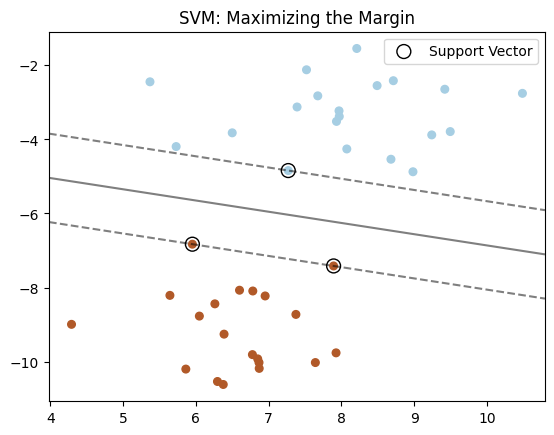

In [17]:
# do write code
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=40, centers=2, random_state=6)
#random_state=3으로 맞추면 세로로 그래프가 바뀜

clf = svm.SVC(kernel='linear', C=1000)
clf.fit(x,y)

def plot_svm_margin(model,x,y):
    plt.scatter(x[:,0],x[:,1],c=y,s=30,cmap=plt.cm.Paired)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0],ylim[1],30)
    yy, xx = np.meshgrid(yy,xx)
    xy = np.vstack([xx.ravel(),yy.ravel()]).T

    Z = model.decision_function(xy).reshape(xx.shape)

    ax.contour(xx,yy,Z, colors='k', levels=[-1,0,1],alpha=0.5, linestyles=['--','-','--'])

    ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1], s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vector')
    plt.legend()

plt.Figure(figsize=(8,5))
plot_svm_margin(clf,x, y)
plt.title('SVM: Maximizing the Margin')
plt.show()

## 3.3. \[예제 2\] 파라미터 C의 영향: 이상치를 허용할 것인가?

의료 데이터에는 늘 노이즈(이상치)가 있다. C값에 따라 모델이 어떻게
변하는지 비교한다.

상황: 정상군 데이터 속에 감염군 데이터 하나가 섞여 들어간 상황.

``` python
# 1. 이상치가 포함된 데이터 준비
X_outlier = np.append(X, [[7, 4]], axis=0) # 엉뚱한 위치에 데이터 추가
y_outlier = np.append(y, [0], axis=0) # 레이블 부여

# 2. 두 가지 C값 비교
plt.figure(figsize=(12, 5))

# Case 1: C=100 (엄격함, Hard Margin) -> 이상치까지 맞추려고 노력함
plt.subplot(1, 2, 1)
clf_hard = svm.SVC(kernel='linear', C=100)
clf_hard.fit(X_outlier, y_outlier)
plot_svm_margin(clf_hard, X_outlier, y_outlier)
plt.title('High C (Hard Margin): Overfitting Risk')

# Case 2: C=0.01 (관대함, Soft Margin) -> 이상치 무시하고 도로를 넓힘
plt.subplot(1, 2, 2)
clf_soft = svm.SVC(kernel='linear', C=0.05)
clf_soft.fit(X_outlier, y_outlier)
plot_svm_margin(clf_soft, X_outlier, y_outlier)
plt.title('Low C (Soft Margin): Better Generalization')

plt.show()

# 설명:
# 왼쪽(C=100)은 이상치 하나 때문에 도로 폭(마진)이 아주 좁아졌다. 불안정하다.
# 오른쪽(C=0.05)은 이상치를 틀리게 놔두고(오분류 허용), 대신 도로를 넓게 폈다.
# 헬스케어에서는 노이즈가 많으므로 적절히 낮은 C가 선호될 때가 많다.
```


> 📖 문제 풀이 가이드
>
> 파라미터 `C`가 마진의 폭과 이상치 처리에 미치는 영향을 비교합니다.
> - C가 클 때 (Hard Margin): "오차는 절대 용납 못 해!" -> 도로 폭이 좁아지고, 데이터에 너무 딱 맞춰서 과적합 위험이 큽니다.
> - C가 작을 때 (Soft Margin): "좀 틀려도 괜찮아, 넓게 보자." -> 도로 폭이 넓어지고, 이상치를 무시하며 일반화 성능이 좋아집니다.



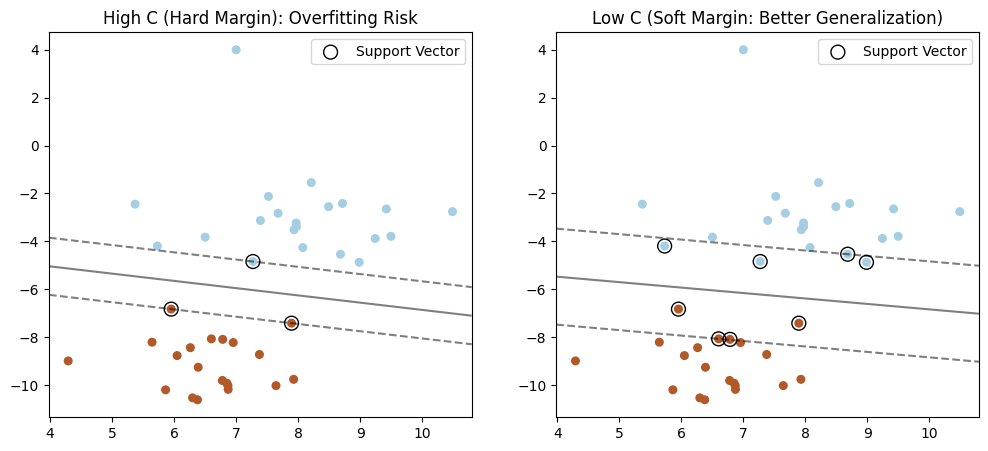

In [16]:
# do write code
x_outlier = np.append(x, [[7,4]], axis=0)
y_outlier = np.append(y,[0], axis=0)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
clf_hard = svm.SVC(kernel='linear', C=100)
clf_hard.fit(x_outlier, y_outlier)
plot_svm_margin(clf_hard,x_outlier,y_outlier)
plt.title('High C (Hard Margin): Overfitting Risk')

plt.subplot(1,2,2)
clf_soft = svm.SVC(kernel='linear', C=0.05)
clf_soft.fit(x_outlier, y_outlier)
plot_svm_margin(clf_soft,x_outlier,y_outlier)
plt.title('Low C (Soft Margin: Better Generalization)')

plt.show()


## 3.4. \[예제 3\] 커널 트릭 (RBF): 비선형 데이터 분류

직선으로 나눌 수 없는 데이터를 RBF(Radial Basis Function) 커널을 사용해
분류해본다.

상황: 약물 투여량 데이터. 너무 적거나(Low), 너무 많으면(High) 효과가
없고(0), 적당량(Middle)일 때만 효과가 있다(1). $\rightarrow$ 원형 분포.

``` python
from sklearn.datasets import make_circles

# 1. 원형 데이터 생성 (도넛 모양)
# factor=0.5: 안쪽 원과 바깥 원의 거리
X_circle, y_circle = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)

# 2. 선형 SVM vs RBF 커널 SVM 비교
plt.figure(figsize=(12, 5))

# 선형 커널 (실패함)
plt.subplot(1, 2, 1)
clf_lin = svm.SVC(kernel='linear')
clf_lin.fit(X_circle, y_circle)
# (시각화 코드는 위와 동일한 로직을 사용하되 contourf를 써서 영역 채우기)
h = .02
x_min, x_max = X_circle[:, 0].min() - 0.5, X_circle[:, 0].max() + 0.5
y_min, y_max = X_circle[:, 1].min() - 0.5, X_circle[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf_lin.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=y_circle, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('Linear Kernel (Fails)')

# RBF 커널 (성공함)
plt.subplot(1, 2, 2)
# kernel='rbf' 설정
clf_rbf = svm.SVC(kernel='rbf', C=10, gamma='scale')
clf_rbf.fit(X_circle, y_circle)

Z = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=y_circle, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('RBF Kernel (Success)')

plt.show()

# 설명:
# 선형 커널은 도넛 모양 데이터를 가를 수 없어 반타작밖에 못한다.
# RBF 커널은 데이터를 감싸는 부드러운 곡선 경계를 만들어냈다.
```


> 📖 문제 풀이 가이드
>
> 직선으로 도저히 나눌 수 없는 도넛 모양 데이터를 커널 트릭(RBF Kernel)으로 해결합니다.
> - Linear Kernel: 직선만 그을 수 있어서 도넛 모양을 절대 못 나눕니다.
> - RBF Kernel: 2차원 데이터를 3차원으로 띄워서 평면으로 자른 후, 다시 2차원으로 보면 곡선으로 나뉘어 있습니다.



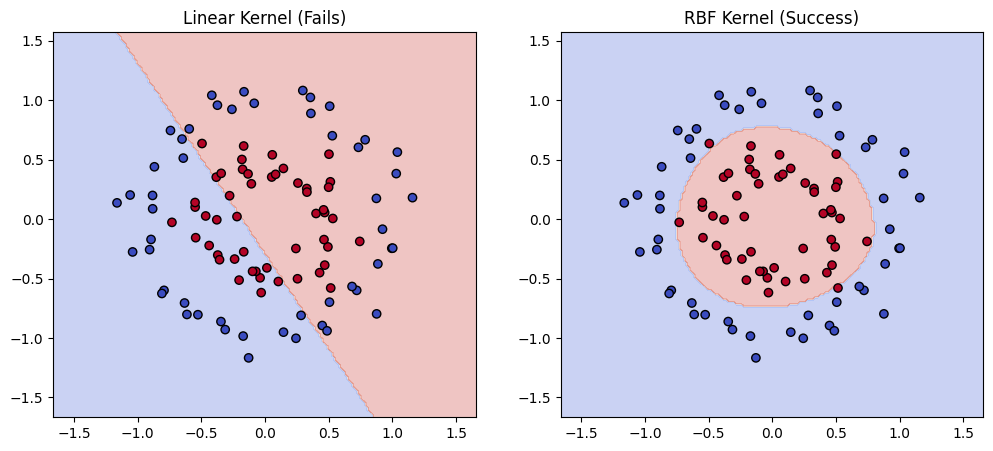

In [21]:
# do write code
from sklearn.datasets import make_circles

x_circle, y_circle = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
clf_lin = svm.SVC(kernel='linear')
clf_lin.fit(x_circle,y_circle)

h = .02
x_min, x_max = x_circle[:,0].min() - 0.5, x_circle[:,0].max()+0.5
y_min, y_max = x_circle[:,1].min() - 0.5, x_circle[:,1].max()+0.5

xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max,h))
z = clf_lin.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx,yy,z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(x_circle[:, 0], x_circle[:, 1], c=y_circle, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('Linear Kernel (Fails)')

# RBF 커널 (성공함)
plt.subplot(1, 2, 2)
# kernel='rbf' 설정
clf_rbf = svm.SVC(kernel='rbf', C=10, gamma='scale')
clf_rbf.fit(x_circle, y_circle)

Z = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(x_circle[:, 0], x_circle[:, 1], c=y_circle, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('RBF Kernel (Success)')

plt.show()

## 3.5. \[예제 4\] 파라미터 Gamma의 영향: 얼마나 민감한가?

RBF 커널의 핵심 파라미터인 `gamma`의 역할을 확인한다. Gamma는 ’데이터
포인트 하나의 영향력 거리’를 결정한다.

상황: 복잡하게 섞인 환자군 데이터 분류.

``` python
# 1. 데이터 준비 (make_blobs 등으로 가정)
X, y = make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=1.2)

# 2. Gamma 비교
gammas = [0.1, 1, 10]
plt.figure(figsize=(15, 4))

for i, g in enumerate(gammas):
    plt.subplot(1, 3, i+1)
    # gamma 값을 변경해가며 학습
    model = svm.SVC(kernel='rbf', gamma=g)
    model.fit(X, y)
    
    # 경계 그리기
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(f'Gamma = {g}')

plt.show()

# 설명:
# Gamma=0.1: 경계가 뭉뚱그려져서 부드럽다 (과소적합 가능성).
# Gamma=10: 데이터 하나하나를 감싸려고 섬(Island) 모양의 경계가 생긴다 (과적합).
# 적절한 Gamma를 찾는 것이 모델 튜닝의 핵심이다.
```


> 📖 문제 풀이 가이드
>
> RBF 커널의 핵심 파라미터 `Gamma`의 역할을 확인합니다.
> - Gamma: 데이터 포인트 하나의 영향력 범위 (클수록 영향력이 좁고 강함)
> - Gamma가 클 때: 데이터 하나하나를 섬세하게 감싸서 울퉁불퉁한 경계를 만듭니다. (과적합 위험)
> - Gamma가 작을 때: 두루뭉술하게 크게 묶습니다. (부드러운 경계)



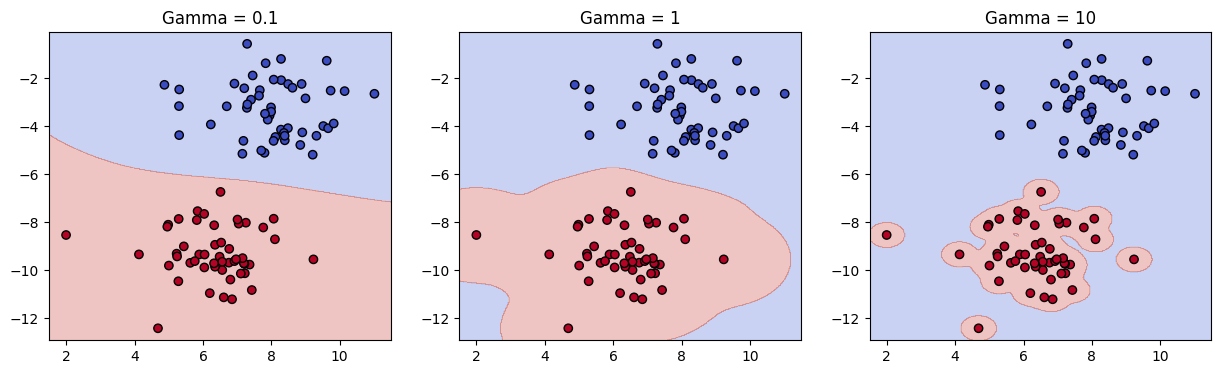

In [29]:
# do write code
X, y = make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=1.2)

# 2. Gamma 비교
gammas = [0.1, 1, 10]
plt.figure(figsize=(15, 4))

for i, g in enumerate(gammas):
    plt.subplot(1, 3, i+1)
    # gamma 값을 변경해가며 학습
    model = svm.SVC(kernel='rbf', gamma=g)
    model.fit(X, y)
    
    # 경계 그리기
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max()+0.5

    xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max,h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(f'Gamma = {g}')

plt.show()

## 3.6. \[예제 5\] \[중요\] SVM 사용 시 필수 전처리: 스케일링

SVM은 ‘거리(Distance)’ 기반 알고리즘이기 때문에 데이터의
스케일(단위)에 매우 민감하다. 스케일링을 안 했을 때 어떤 참사가
일어나는지 확인한다.

상황: 유방암 데이터셋(Breast Cancer) 분류.

``` python
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. 데이터 로드
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Case 1: 스케일링 없이 학습
svc = svm.SVC(C=1, gamma='auto') # gamma='auto'는 1/n_features
svc.fit(X_train, y_train)
print(f"스케일링 전 정확도: {svc.score(X_test, y_test):.3f}")

# 2. 스케일링 적용 (MinMaxScaler or StandardScaler)
# SVM은 보통 StandardScaler나 MinMaxScaler가 필수다.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Case 2: 스케일링 후 학습
svc_scaled = svm.SVC(C=1, gamma='auto')
svc_scaled.fit(X_train_scaled, y_train_scaled)
print(f"스케일링 후 정확도: {svc_scaled.score(X_test_scaled, y_test):.3f}")

# 결과 예시:
# 전: 0.622 (거의 찍는 수준) -> 후: 0.972 (매우 높음)
# 설명:
# 유방암 데이터에는 '크기(1000단위)'와 '매끄러움(0.01단위)' 등 단위 차이가 큰 변수들이 섞여 있다.
# 스케일링을 안 하면 큰 숫자를 가진 변수가 거리를 지배해버려 학습이 안 된다.
```


> 📖 문제 풀이 가이드
>
> SVM 사용 시 스케일링(Scaling)이 왜 필수인지 증명합니다.
> - 원인: SVM은 거리(Distance)를 기반으로 합니다.
> - 현상: 단위가 큰 변수(예: 1000)가 단위가 작은 변수(예: 0.1)를 압도해버립니다.
> - 해결: 모든 변수를 0~1 사이(MinMax)나 표준정규분포(Standard)로 맞춰주면 성능이 극적으로 향상됩니다.



In [32]:
# do write code
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. 데이터 로드
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# b_cancer = load_breast_cancer()
# print(b_cancer.keys())
# print(b_cancer.data.shape)
# print(b_cancer.target_names)
# print(b_cancer.target)

# Case 1: 스케일링 없이 학습
svc = svm.SVC(C=1, gamma='auto') # gamma='auto'는 1/n_features
svc.fit(X_train, y_train)
print(f"스케일링 전 정확도: {svc.score(X_test, y_test):.3f}")

# 2. 스케일링 적용 (MinMaxScaler or StandardScaler)
# SVM은 보통 StandardScaler나 MinMaxScaler가 필수다.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Case 2: 스케일링 후 학습
svc_scaled = svm.SVC(C=1, gamma='auto')
svc_scaled.fit(X_train_scaled, y_train)
print(f"스케일링 후 정확도: {svc_scaled.score(X_test_scaled, y_test):.3f}")


스케일링 전 정확도: 0.622
스케일링 후 정확도: 0.972
